In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

from alphapackage.operators import *
from alphapackage.data_utils import DataHolder
from alphapackage.alphas import BaseAlpha

In [10]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
dh = DataHolder(path="../csv_data", filter_outliers=False)
rtrns = {}

In [ ]:
def run_alpha(Alpha : BaseAlpha):
    global rtrns
    test_alpha = Alpha()
    test_alpha.get_weights(dh)
    test_alpha.run_weights(dh)
    test_alpha.print_average_stats()
    test_alpha.print_yearly_stats()
    test_alpha.plot_cumpnl()

    rtrns[Alpha.__name__] = test_alpha.pnl

def compare_alphas(rtrns, figsize=(10, 6), cmap='Blues', title='Корреляция альф'):
    df = pd.DataFrame(rtrns)
    correlation_matrix = df.corr()

    plt.figure(figsize=figsize)
    sns.heatmap(
        correlation_matrix,
        cmap=cmap,
        annot=True,
        fmt='.2f'
    )
    plt.title(title, fontsize=16)
    plt.tight_layout()
    plt.show()

***
$$ \alpha_{1} = \frac{open}{close} $$

In [28]:
class Alpha1(BaseAlpha):
    def get_weights(self, dh : DataHolder):
        raw = dh.data['open'].div(dh.data['close'])
        self.w = decay(raw, 5)
        self.w = neutralize(self.w)
        self.w = normalize(self.w)

****************************************
average_turnover = 0.7274595659826604
average_Sharpe = 2.7701214285303823
****************************************
Максимальная просадка за 2016 год: 0.0547295554356767
Коэффициент Шарпа за 2016 год: 3.5821533309320293
Средний оборот за 2016 год: 0.7147011272832464
Суммарная доходность за 2016 год: 0.34154448218056116
------------------------------
Максимальная просадка за 2017 год: 0.02784390896476069
Коэффициент Шарпа за 2017 год: 3.415541393164745
Средний оборот за 2017 год: 0.7242008381402543
Суммарная доходность за 2017 год: 0.2461426947427809
------------------------------
Максимальная просадка за 2018 год: 0.031743040126241406
Коэффициент Шарпа за 2018 год: 4.259838416305771
Средний оборот за 2018 год: 0.728709220989818
Суммарная доходность за 2018 год: 0.38275220605776383
------------------------------
Максимальная просадка за 2019 год: 0.1013255882289803
Коэффициент Шарпа за 2019 год: 1.9723931869311742
Средний оборот за 2019 год: 0.715

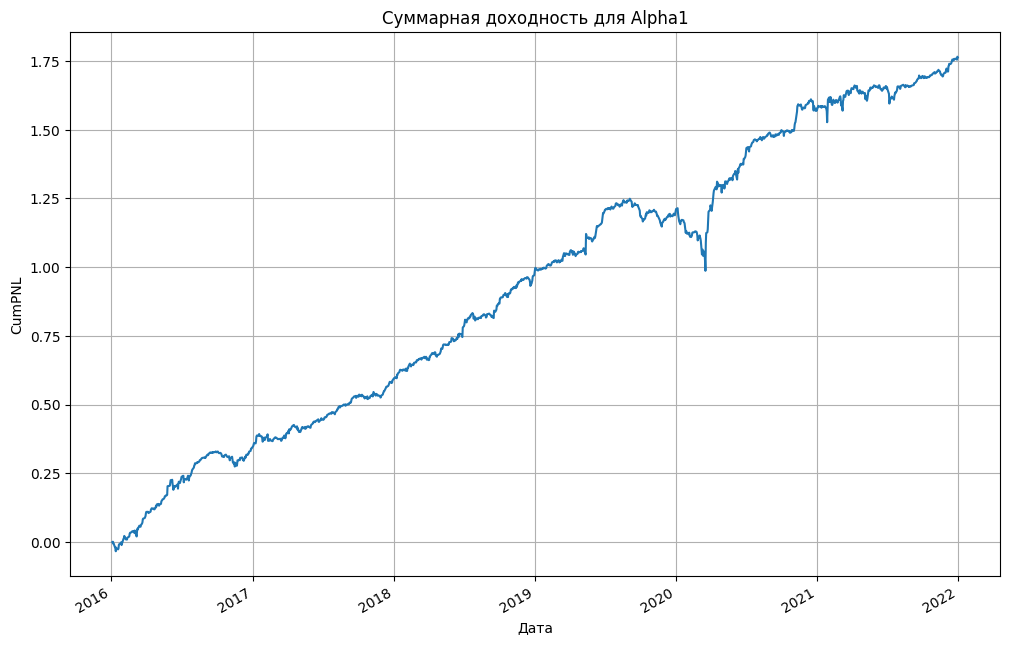

In [29]:
run_alpha(Alpha1)

***
$$ \alpha_{2} = \frac{high}{close} $$

In [30]:
class Alpha2(BaseAlpha):
    def get_weights(self, dh):
        raw = dh.data['high'].div(dh.data['close'])
        self.w = decay(raw, 5)
        self.w = normalize(neutralize(self.w))

****************************************
average_turnover = 0.3583282243786899
average_Sharpe = 1.9137552668844993
****************************************
Максимальная просадка за 2016 год: 0.060861902303312676
Коэффициент Шарпа за 2016 год: 3.010738416806148
Средний оборот за 2016 год: 0.3507896347333421
Суммарная доходность за 2016 год: 0.3262768387459857
------------------------------
Максимальная просадка за 2017 год: 0.04751999017222441
Коэффициент Шарпа за 2017 год: 2.3458330065945527
Средний оборот за 2017 год: 0.3500393692467464
Суммарная доходность за 2017 год: 0.19056331171786278
------------------------------
Максимальная просадка за 2018 год: 0.07659100326866686
Коэффициент Шарпа за 2018 год: 1.2163263935172006
Средний оборот за 2018 год: 0.367322450591967
Суммарная доходность за 2018 год: 0.1387424251077658
------------------------------
Максимальная просадка за 2019 год: 0.10025769501658977
Коэффициент Шарпа за 2019 год: 0.8557617171391075
Средний оборот за 2019 год: 0.3

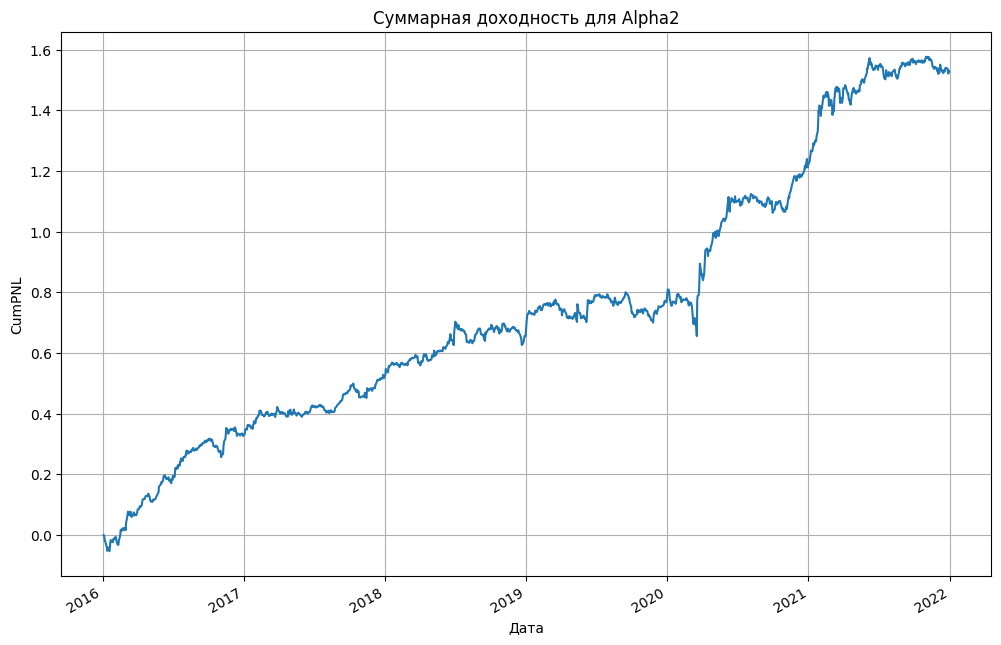

In [31]:
run_alpha(Alpha2)

***
$$ \alpha_{3} = close(d-4)/close(d-1) $$

In [37]:
class Alpha3(BaseAlpha):
    def get_weights(self, dh):
        raw = dh.data['close'].shift(8).div(dh.data['close'].shift(1))
        self.w = decay(raw, 5)
        self.w = normalize(neutralize(self.w))

****************************************
average_turnover = 0.30207850632883
average_Sharpe = 1.2279740959782757
****************************************
Максимальная просадка за 2016 год: 0.02666835784778354
Коэффициент Шарпа за 2016 год: 2.4723685426003126
Средний оборот за 2016 год: 0.2897240916051306
Суммарная доходность за 2016 год: 0.25591828472429545
------------------------------
Максимальная просадка за 2017 год: 0.03276998089751776
Коэффициент Шарпа за 2017 год: 1.7261564547883226
Средний оборот за 2017 год: 0.30529723749586263
Суммарная доходность за 2017 год: 0.09552649574503935
------------------------------
Максимальная просадка за 2018 год: 0.1004046301798297
Коэффициент Шарпа за 2018 год: 0.3572650580893427
Средний оборот за 2018 год: 0.30352828258047043
Суммарная доходность за 2018 год: 0.06832202914197986
------------------------------
Максимальная просадка за 2019 год: 0.08669068722723983
Коэффициент Шарпа за 2019 год: 1.1980303628791895
Средний оборот за 2019 год: 0

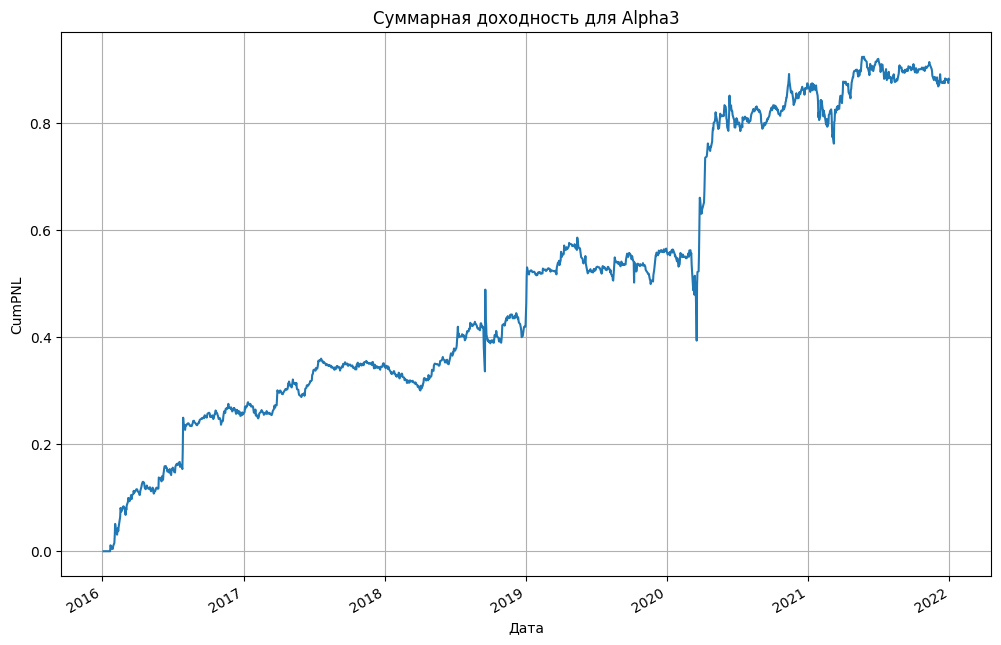

In [38]:
run_alpha(Alpha3)

***
$$\alpha_{4} = - \frac{(low - close) * open^5}{(low - high) * close^5} $$

In [82]:
class Alpha4(BaseAlpha):
    def get_weights(self, dh):
        raw = (-1 * ((dh.data['low'] - dh.data['close']) * (dh.data['open'].pow(5)))) / ((dh.data['low'] - dh.data['high']) * (dh.data['close'].pow(5)))
        self.w = decay(raw, 5)
        self.w = normalize(neutralize(self.w))

****************************************
average_turnover = 0.6996369282542378
average_Sharpe = 6.467391155962866
****************************************
Максимальная просадка за 2016 год: 0.01092560501268837
Коэффициент Шарпа за 2016 год: 7.185275840349907
Средний оборот за 2016 год: 0.6805336173673532
Суммарная доходность за 2016 год: 0.2385067042454589
------------------------------
Максимальная просадка за 2017 год: 0.007408763019578657
Коэффициент Шарпа за 2017 год: 8.08348406737889
Средний оборот за 2017 год: 0.6971048257517027
Суммарная доходность за 2017 год: 0.20921495296827014
------------------------------
Максимальная просадка за 2018 год: 0.004800659419609832
Коэффициент Шарпа за 2018 год: 8.398178756739542
Средний оборот за 2018 год: 0.7072536318790755
Суммарная доходность за 2018 год: 0.2522912970050222
------------------------------
Максимальная просадка за 2019 год: 0.008520140603264115
Коэффициент Шарпа за 2019 год: 6.205437026404071
Средний оборот за 2019 год: 0.702

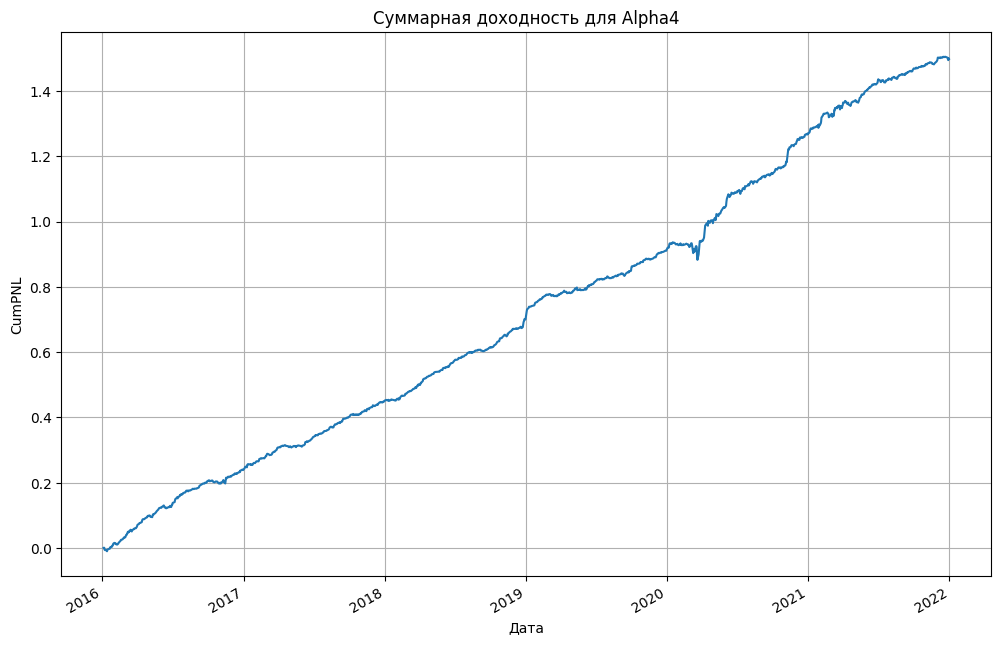

In [83]:
run_alpha(Alpha4)

***
$$ \alpha_{5} = $$

In [122]:
class Alpha5(BaseAlpha):
    def get_weights(self, dh):
        raw = ts_zscore(dh.data['volume'], 10)
        # raw = ts_rank(dh.data['volume'], 10)
        self.w = decay(raw, 4)
        self.w = normalize(neutralize(self.w))

****************************************
average_turnover = 0.627336940732856
average_Sharpe = 2.1215349903249723
****************************************
Максимальная просадка за 2016 год: 0.016673298558513287
Коэффициент Шарпа за 2016 год: 1.6037319470220315
Средний оборот за 2016 год: 0.6013230064906474
Суммарная доходность за 2016 год: 0.044139954903474096
------------------------------
Максимальная просадка за 2017 год: 0.010408396820049834
Коэффициент Шарпа за 2017 год: 2.1188379513118236
Средний оборот за 2017 год: 0.6332807702868894
Суммарная доходность за 2017 год: 0.04431463028043521
------------------------------
Максимальная просадка за 2018 год: 0.00895677018819152
Коэффициент Шарпа за 2018 год: 2.089924562981885
Средний оборот за 2018 год: 0.6299945413118992
Суммарная доходность за 2018 год: 0.04850715773761636
------------------------------
Максимальная просадка за 2019 год: 0.006780382409116825
Коэффициент Шарпа за 2019 год: 3.526919930746931
Средний оборот за 2019 год:

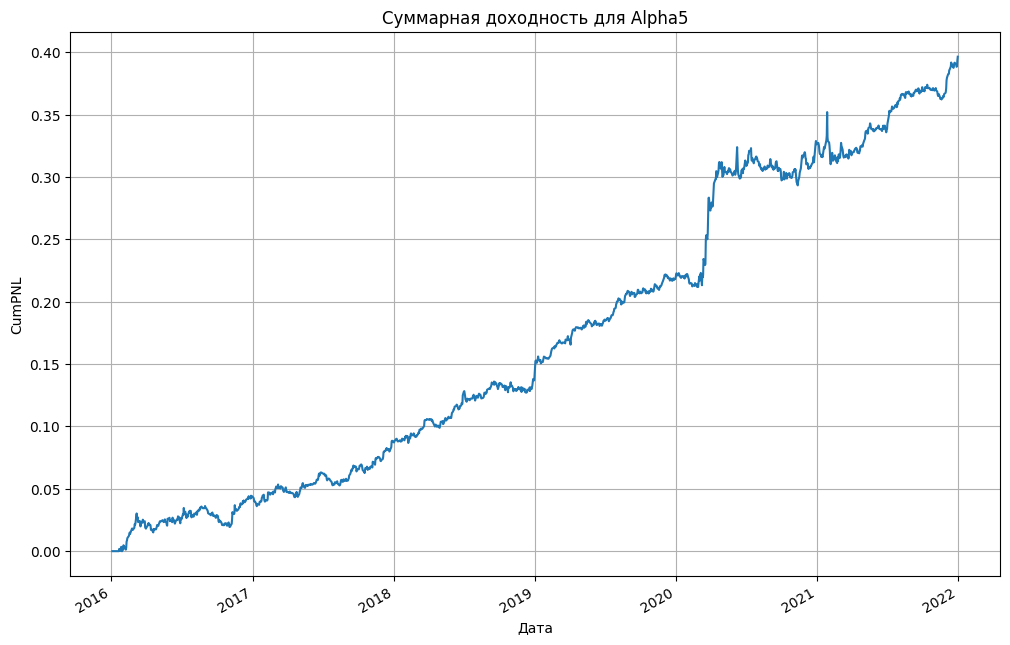

In [123]:
run_alpha(Alpha5)

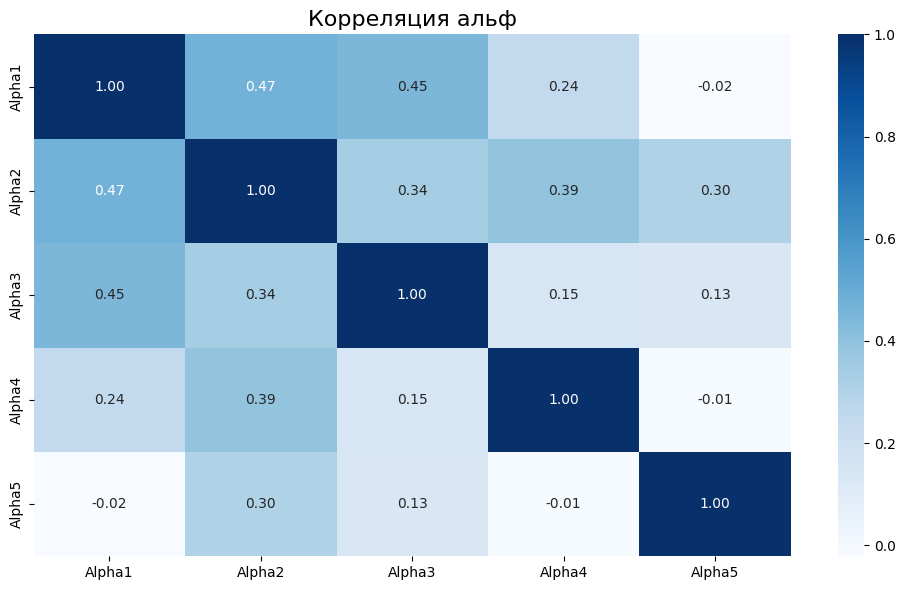

In [109]:
compare_alphas(rtrns)

In [ ]:
# def get_decay_param(alpha : pd.DataFrame, returns : pd.DataFrame, n_max : int = 10) -> int:
#     _pnl : pd.Series = calculate_holding_pnl(alpha, returns)
#     _turnover : pd.Series = calculate_turnover(alpha)
#     best_score = (_pnl / _turnover).mean()
#     print(f"n = 1, temp_score = {best_score}, cumpnl = {_pnl.sum()}, turnover = {_turnover.mean()}")
    
#     best_n = 1
#     params = np.arange(2, n_max + 1)
#     for n in params:
#         decayed_alpha = decay(alpha, n)
#         _pnl = calculate_holding_pnl(decayed_alpha, returns)dh.data['volume'], 10
#         _turnover = calculate_turnover(decayed_alpha)
#         temp_score = (_pnl / _turnover).mean()
#         print(f"n = {n}, temp_score = {temp_score}, cumpnl = {_pnl.sum()}, turnover = {_turnover.mean()}")
#         if temp_score > best_score:
#             best_score = temp_score
#             best_n = n

#     return best_n

In [ ]:
# returns = calculate_returns(close)

# double_close = close * close
# test_alpha = (high * low).div(double_close)

# n = get_decay_param(alpha=test_alpha, returns=returns, n_max = 30)

n = 1, temp_score = 0.04022267770170688, cumpnl = 1768.6537016209106, turnover = 32.714829878701835
n = 2, temp_score = 0.0700775893097406, cumpnl = 1.3417222038471621, turnover = 0.013690783859508022
n = 3, temp_score = 0.09883646690620061, cumpnl = 1.3332966275623723, turnover = 0.009687212197982666
n = 4, temp_score = 0.1296064278469537, cumpnl = 1.3283848365809026, turnover = 0.007508026432274383
n = 5, temp_score = 0.16137277042865375, cumpnl = 1.325088550467115, turnover = 0.00613879989129083
n = 6, temp_score = 0.1928960978774112, cumpnl = 1.3226076444499593, turnover = 0.005190748181265425
n = 7, temp_score = 0.2258582499894949, cumpnl = 1.3204111176667903, turnover = 0.004499901048491642
n = 8, temp_score = 0.25798342593904505, cumpnl = 1.318762519417759, turnover = 0.003972287314723572
n = 9, temp_score = 0.28974546909093085, cumpnl = 1.3174061161841615, turnover = 0.003556336348675668
n = 10, temp_score = 0.32083078572029206, cumpnl = 1.3162862200772223, turnover = 0.0032183